In [41]:
dir = '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current'

import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

# Finding Trigdat file
trig_string = "_trigdat_"
trig_pattern = os.path.join(dir, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

print(trigdat_file)

for s in trigdat_file[0].split('_'):
    if 'bn' in s:
        trigger = s
        break
print(trigger)

# Getting the RA and DEC
with fits.open(trigdat_file[0], memmap=True) as pha_list:
    ra_obj, dec_obj = (pha_list[0].header['RA_OBJ']), (pha_list[0].header['DEC_OBJ'])

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj, dec_obj,trigdat_file[0])

print(brightest_nai)
print(bright_nais)
print(brightest_bgo)

# Finding TTE files
tte_string = "_tte_"
tte_pattern = os.path.join(dir, f"*{tte_string}*")
tte_files = glob.glob(tte_pattern)
tte_files.sort()
print(tte_files)

# Finding rsp files
rsp_string = ".rsp"
rsp_pattern = os.path.join(dir, f"*{rsp_string}*")
rsp_files = glob.glob(rsp_pattern)

for file in rsp_files:
    if 'ctime' in file:
        rsp_files.remove(file)
        continue
    if 'ctime' in file.split('_'):
        rsp_files.remove(file)
        
rsp_files.sort()
print(rsp_files)

NaI_detectors = []
rsp_NaI_files = []
rsp2_NaI_files = []
for nai in bright_nais:
    for file in rsp_files:
        if 'ctime' in file:
            rsp_files.remove(file)
            continue
        elif brightest_bgo[0] in file and 'rsp2' in file:
            rsp2_BGO_file = [file]
            continue
        elif brightest_bgo[0] in file and 'rsp' in file:
            rsp_BGO_file = [file]
            continue
        elif nai in file and 'rsp2' in file:
            rsp2_NaI_files.append(file)
            continue
        elif nai in file and 'rsp' in file:
            rsp_NaI_files.append(file)
    for file in tte_files:
        if brightest_bgo[0] in file:
            BGO_detector = [file]
        if nai in file:
            NaI_detectors.append(file)
            break

NaI_detectors =  NaI_detectors[0:2]
rsp_NaI_files =  rsp_NaI_files[0:2]
rsp2_NaI_files = rsp2_NaI_files[0:2]

print(NaI_detectors)
print(BGO_detector)
print(rsp_NaI_files)
print(rsp2_NaI_files)
print(rsp_BGO_file)
try:
    print(rsp2_BGO_file)
except:
    print('no rsp2 file')

tte_file = NaI_detectors[0]
with fits.open(tte_file, memmap=True) as hdul:
    all_count_data = hdul[2].data
    trigtime = hdul[2].header['TRIGTIME']

counts = all_count_data['TIME'].astype(float) - trigtime
cmin = counts.min()
cmax = counts.max()
print(f"Earliest count {cmin:.2f}, latest count {cmax:.2f}")

['/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_trigdat_all_bn181104784_v01.fit']
bn181104784/current/glg
 
The brightest NaI detector is n1 - Source angle is: 31 deg
The brightest 3 NaI detectors are n1 ( 31 deg) n3 ( 40 deg) n0 ( 41 deg)
The brightest BGO detector is b0 ( 35 deg )
n1
['n1', 'n3', 'n0']
['b0']
['/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_b0_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_b1_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n0_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n1_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n2_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n3_bn181104784_v00.fit', '/home/arpan-john/Desktop/cans/SFLAREC_bn181104784/current/glg_tte_n4_bn181104784_v00.fit', '/home/arpan-john/Desktop/

In [42]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

def create_centered_heatmap(ra_center, dec_center, size=10, resolution=100):
    """
    Create a heatmap centered on given RA and Dec coordinates.
    
    Args:
    ra_center (float): Right Ascension of the center point in degrees
    dec_center (float): Declination of the center point in degrees
    size (float): Size of the heatmap in degrees (default: 10)
    resolution (int): Number of pixels along each axis (default: 100)
    
    Returns:
    tuple: (heatmap, ra_array, dec_array)
    """
    
    # Create RA and Dec arrays
    ra_min, ra_max = ra_center - size/2, ra_center + size/2
    dec_min, dec_max = dec_center - size/2, dec_center + size/2
    
    ra_array = np.linspace(ra_min, ra_max, resolution)
    dec_array = np.linspace(dec_min, dec_max, resolution)
    
    # Create a 2D grid of coordinates
    ra_grid, dec_grid = np.meshgrid(ra_array, dec_array)
    
    # Calculate the distance from each point to the center
    center = SkyCoord(ra_center*u.deg, dec_center*u.deg)
    points = SkyCoord(ra_grid*u.deg, dec_grid*u.deg)
    separations = center.separation(points)
    
    # Create a Gaussian-like heatmap
    heatmap = np.exp(-(separations.deg**2) / (2 * (size/6)**2))
    
    return heatmap, ra_array, dec_array

glg_trigdat_all_bn181104784_v01.fit
563050153.924068
213.0167 -51.3167


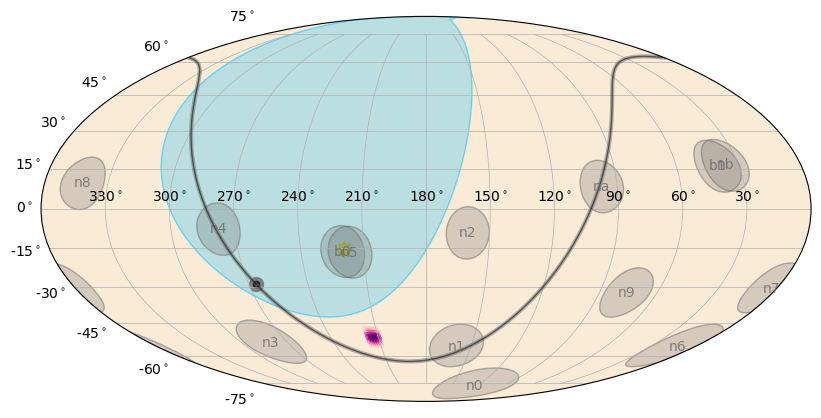

In [43]:
from gbm.data import Trigdat

trigdat = Trigdat.open(trigdat_file[0])
print(trigdat)
print(trigdat.trigtime)

print(ra_obj,dec_obj)
heatmap, ra_array, dec_array = create_centered_heatmap(ra_obj, dec_obj)
#  a sky plot of the detector pointings and Earth blockage
from gbm.plot import SkyPlot

skyplot = SkyPlot()
skyplot.add_poshist(trigdat)
skyplot.plot_heatmap(heatmap, ra_array, dec_array)

In [38]:
print(type(skyplot))

<class 'gbm.plot.skyplot.SkyPlot'>


In [39]:
from gbm import time

obs = time.Met(563050153.924068)

print('YYMMDDfff')
print(obs.ymd_h)

YYMMDDfff
181104_18z


In [40]:
from gbm import test_data_dir
from gbm.data import GbmHealPix

# open a GBM localization
loc = GbmHealPix.open('/home/arpan-john/Desktop/cans/SGRC_bn181104784/current/glg_healpix_all_bn181104784_v02.fit')
print(loc)

OSError: File /home/arpan-john/Desktop/cans/SGRC_bn181104784/current/glg_healpix_all_bn181104784_v02.fit does not exist

Healpix nside: 128
Healpix npix: 196608
Pixel area (sq. deg.): 0.20982341130279172
2.057560858223195e-08
0.0
Sun location: (219.5970388797419, -15.44548481660705)
Geocenter location: (235.2282541725517, 24.66401871841285)
Geocenter radius: 67.5 deg
Detector n0 pointing: (122.8282747073767, -76.25578018696568)
Fraction of localization on Earth 0.019621461629867554


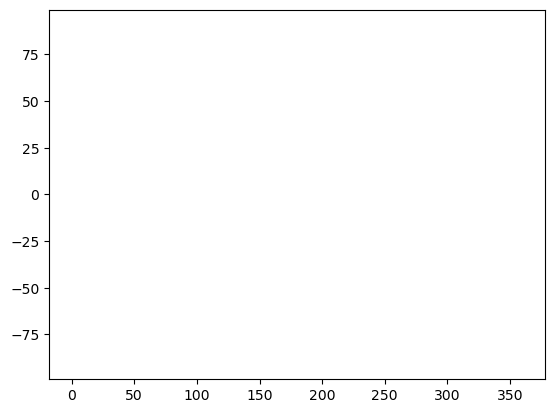

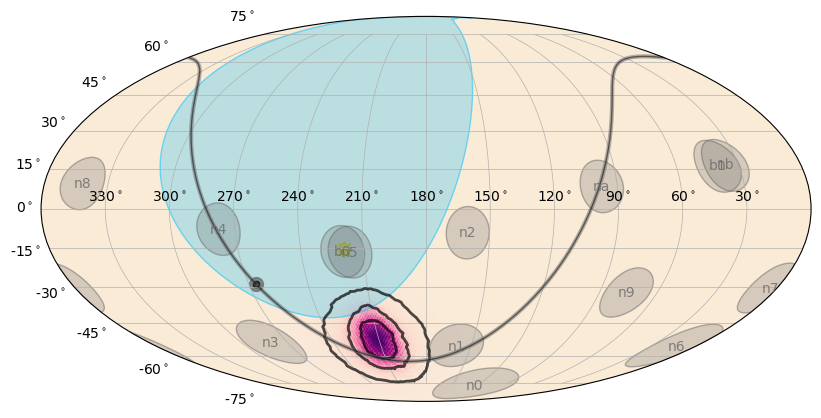

In [ ]:
print('Healpix nside: {}'.format(loc.nside))
print('Healpix npix: {}'.format(loc.npix))
print('Pixel area (sq. deg.): {}'.format(loc.pixel_area))
loc.centroid
loc.probability(49.0, 4.0)
loc.confidence(40.0, 4.0)
loc.area(0.9) # 90% confidence in units of sq. degrees
%matplotlib agg
loc.confidence_region_path(0.5)
# find the probability that a point source on the sky is associated with our skymap
print(loc.source_probability(50.0, 10.0))
print(loc.source_probability(150.0, 10.0))
# Info of other relevant things...
print('Sun location: {}'.format(loc.sun_location))
print('Geocenter location: {}'.format(loc.geo_location))
print('Geocenter radius: {} deg'.format(loc.geo_radius))
print('Detector n0 pointing: {}'.format(loc.n0_pointing))
print('Fraction of localization on Earth {}'.format(loc.geo_probability))
%matplotlib inline
from gbm.plot import SkyPlot

# initialize
skyplot = SkyPlot()

# add our HEALPix object
skyplot.add_healpix(loc)